# 🏪 Proyecto Aurelion

Este notebook documenta el proceso de **análisis, limpieza y transformación de datos** de la tabla `CLIENTES` del proyecto *Aurelion*, utilizando la biblioteca **Pandas** en Python.

El objetivo es preparar un conjunto de datos estructurado, limpio y estandarizado para posteriores procesos de análisis estadístico, modelado o visualización.

## 📊 Descripción General

La tabla `VENTAS` contiene información detallada sobre operaciones comerciales, incluyendo campos de identificación, fechas, montos y categorías de productos.

A lo largo de este notebook se realizarán las siguientes tareas principales:

- Importación de los datos desde un archivo **Excel (.xlsx)**.  
- Creación del dataframe inicial `df_clientes_c`.  
- Procesamiento, normalización y renombrado de columnas para generar el dataframe limpio `df_clientes`.  
- Aplicación de operaciones básicas de **limpieza**, **transformación** y **estandarización** de los datos.  
- Generación de **estadísticas descriptivas** para comprender la distribución y consistencia de las variables.

## ⚙️ Limpieza y Transformación de los Datos

En esta sección se detallan las operaciones realizadas para asegurar la integridad y coherencia del dataset:

1. **Revisión de valores nulos y duplicados.**  
   - Identificación y tratamiento de valores faltantes.  
   - Eliminación o imputación según el contexto de negocio.

2. **Estandarización de tipos de datos.**  
   - Conversión de fechas, montos y categorías al formato correcto.  
   - Normalización de cadenas y eliminación de espacios o caracteres no deseados.

3. **Renombrado de columnas.**  
   - Aplicación de nombres consistentes y descriptivos conforme a las buenas prácticas de análisis de datos.

4. **Validación del dataframe final.**  
   - Verificación de dimensiones, tipos y contenido.  
   - Comparación con el dataframe original (`df_clientes_c`).

#### Importamos librerias instaladas para implementarlas en el código

In [72]:
# Importa paquetes de an?lisis (pandas/numpy) y visualizaci?n (matplotlib/seaborn) con rutas portables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## 📥 Carga del Archivo de Datos

En esta sección se realiza la **importación del dataset principal** utilizando una **ruta relativa** y la librería `pathlib.Path`. Esto no solo simplifica la ruta, sino que también garantiza que el código sea **portable** y funcione correctamente en diferentes sistemas operativos (Windows, macOS, Linux), siempre y cuando la estructura de directorios se mantenga consistente.

> 📂 **Ruta del archivo:**  
> El archivo se accede mediante la construcción **`Path('db') / 'clientes.xlsx'`**.

La lectura del archivo se efectúa mediante la función `pd.read_excel()` de la biblioteca **pandas**, creando el dataframe inicial `df_clientes_c`, el cual servirá como base para los procesos posteriores de limpieza y análisis.

In [73]:
# Lee el listado de clientes desde la carpeta db usando rutas relativas
path_dataset = Path('db') / 'clientes.xlsx'
df_clientes_c = pd.read_excel(path_dataset)

# Inspecciona los primeros registros para validar estructura y campos
df_clientes_c.head()

,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03
3,4,Uma Martinez,uma.martinez@mail.com,Carlos Paz,2023-01-04
4,5,Agustina Flores,agustina.flores@mail.com,Cordoba,2023-01-05


## 🔍 Inspección Inicial del Dataset

En esta etapa se realiza una **inspección exploratoria básica** del DataFrame `df_clientes_c` recién cargado, con el objetivo de verificar que los datos se hayan importado correctamente y posean la estructura esperada.

Para ello, se utilizan las funciones:

In [74]:
# Ampl?a la vista inicial a 8 filas para detectar anomal?as tempranas
df_clientes_c.head(8)


,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03
3,4,Uma Martinez,uma.martinez@mail.com,Carlos Paz,2023-01-04
4,5,Agustina Flores,agustina.flores@mail.com,Cordoba,2023-01-05
5,6,Uma Medina,uma.medina@mail.com,Villa Maria,2023-01-06
6,7,Emilia Castro,emilia.castro@mail.com,Rio Cuarto,2023-01-07
7,8,Bruno Castro,bruno.castro@mail.com,Carlos Paz,2023-01-08


In [75]:
# Revisa las ?ltimas 4 filas para confirmar consistencia al final del archivo
df_clientes_c.tail(4)

,id_cliente,nombre_cliente,email,ciudad,fecha_alta
96,97,Uma Alvarez,uma.alvarez@mail.com,Cordoba,2023-04-07
97,98,Camila Castro,camila.castro@mail.com,Cordoba,2023-04-08
98,99,Bruno Molina,bruno.molina@mail.com,Villa Maria,2023-04-09
99,100,Agustina Lopez,agustina.lopez@mail.com,Cordoba,2023-04-10


## 🧠 Exploración de Tipos de Datos y Valores Nulos

En esta etapa se realiza una **revisión estructural del DataFrame** para confirmar que los tipos de datos asignados a cada variable durante la lectura con `pd.read_excel()` sean correctos y coherentes con la naturaleza de la información (por ejemplo, fechas, números, textos, etc.).

Además, se evalúa la **presencia de valores nulos o faltantes**, los cuales podrían requerir tratamiento posterior durante el proceso de limpieza y estandarización.

### 🧩 Procedimiento

In [76]:
# Resume tipos de datos, nulos y memoria del dataframe importado
df_clientes_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_cliente      100 non-null    int64         
 1   nombre_cliente  100 non-null    object        
 2   email           100 non-null    object        
 3   ciudad          100 non-null    object        
 4   fecha_alta      100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.0+ KB


> 💡 **Conclusión:**
> A partir de la ejecución de la inspección del DataFrame, se observa que la base de datos cuenta con **100 registros** distribuidos en **5 columnas**. 
> Cada columna presenta **100 valores no nulos**, lo que indica que **no existen datos faltantes (NaN)** en el dataset en esta etapa.
> Los tipos de datos se encuentran con una **estructura inicial muy limpia**: `id_cliente` es un entero (`int64`), apropiado para un identificador clave. `fecha_alta` ya se encuentra correctamente definida como temporal (`datetime64[ns]`). Los campos descriptivos `nombre_cliente`, `email` y `ciudad` son texto (`object`). Esta estructura inicial es **coherente y está lista** para los procesos de **normalización** de texto (ej. estandarización de mayúsculas/minúsculas y eliminación de espacios) antes de cualquier análisis.   

### 🕵️‍♂️ Detección de Valores Nulos

Se analiza la presencia de valores faltantes para priorizar acciones de limpieza y asegurar la consistencia del dataset.

In [77]:
# Visualiza la máscara booleana donde True marca valores faltantes por celda
df_clientes_c.isnull()

,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,False,False,False,False,False
97,False,False,False,False,False
98,False,False,False,False,False


In [78]:
# Resume la cantidad de nulos por columna para priorizar limpieza
df_clientes_c.isnull().sum()

id_cliente        0
nombre_cliente    0
email             0
ciudad            0
fecha_alta        0
dtype: int64

## ⚙️ Normalización y Corrección de Tipos de Datos

Antes de realizar la normalización de la base de datos, es necesario **estandarizar los campos de texto** para asegurar la unicidad de los registros descriptivos. En este caso, se normalizan las columnas `nombre_cliente`, `email` y `ciudad`. Adicionalmente, se verifica la correcta definición de la columna temporal `fecha_alta` y se optimiza el campo `ciudad` a tipo `categórico` para mejorar la eficiencia del DataFrame.

### 🧩 Fundamento

La **normalización de texto** garantiza que un mismo valor no sea interpretado como diferente debido a variaciones en el formato (ej. espacios iniciales/finales, mayúsculas). Esto es crucial en campos como `email` y `ciudad` para asegurar agrupaciones correctas y evitar errores en búsquedas.

1. **Extracción:** se importan los datos desde el archivo Excel.  
2. **Transformación estructural:** se ajustan los tipos de datos para asegurar coherencia.  
3. **Normalización:** se reorganiza la base, eliminando redundancias o columnas innecesarias.

### 🧮 Procedimiento

- Se aplican las transformaciones para:

     **Fecha:** Asegurar formato `datetime64[ns]` para `fecha_alta` (conversión necesaria).

     **Texto:** Limpiar `nombre_cliente` (eliminar espacios, formato título), `email` y `ciudad` (eliminar espacios, minúsculas).

     **Categóricas:** Convertir `ciudad` a tipo `category` para optimizar la memoria.


In [79]:
# 1. Normalización de Campos de Texto
# Aplicar limpieza de espacios y estandarización de formato.

# Normalizar 'nombre_cliente' (Formato Título para nombres propios)
df_clientes_c['nombre_cliente'] = (
    df_clientes_c['nombre_cliente']
    .str.strip()
    .str.title() 
)

# Normalizar 'email' y 'ciudad' (Minúsculas para unicidad de agrupación)
df_clientes_c['email'] = (
    df_clientes_c['email']
    .str.strip()
    .str.lower()
)
df_clientes_c['ciudad'] = (
    df_clientes_c['ciudad']
    .str.strip()
    .str.lower()
)

# 2. Optimización de Tipo Categórico
# Se convierte 'ciudad' a tipo 'category' para optimizar la memoria,
# ya que generalmente tiene un número limitado de valores únicos.
df_clientes_c['ciudad'] = df_clientes_c['ciudad'].astype('category')

#### 🕵️‍♂️ Verificación de Transformaciones

Se valida que los cambios aplicados hayan surtido efecto tanto en los tipos de datos como en los valores muestreados.

In [80]:
# Verifica los tipos de datos de las columnas normalizadas en la tabla CLIENTES
df_clientes_c[["id_cliente", "nombre_cliente", "email", "ciudad", "fecha_alta"]].dtypes

id_cliente                 int64
nombre_cliente            object
email                     object
ciudad                  category
fecha_alta        datetime64[ns]
dtype: object

In [81]:
# Realiza muestreo de las columnas transformadas para comprobar resultados
df_clientes_c[["id_cliente", "nombre_cliente", "email", "ciudad", "fecha_alta"]].head()

,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,carlos paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,carlos paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,rio cuarto,2023-01-03
3,4,Uma Martinez,uma.martinez@mail.com,carlos paz,2023-01-04
4,5,Agustina Flores,agustina.flores@mail.com,cordoba,2023-01-05


#### 🕵️‍♂️ Control de Calidad: Duplicados

Se evalúa la unicidad de registros, especialmente en la columna `id_cliente`, que actúa como identificador clave.

In [82]:
# Evalúa duplicados globales y por id_cliente para validar la unicidad clave de clientes
cantidad_duplicados = df_clientes_c.duplicated().sum()
duplicados_id_cliente = df_clientes_c['id_cliente'].duplicated().sum()

print()
print('--- Registros Duplicados ---')
if cantidad_duplicados > 0:
    print(f'Se encontraron {cantidad_duplicados} filas duplicadas.')    
else:
    print('No se encontraron filas duplicadas.')

print()
if duplicados_id_cliente > 0:
    print(f'Alerta: se detectaron {duplicados_id_cliente} valores repetidos en id_cliente (posible clave primaria).')
else:
    print('id_cliente es único en df_clientes_c.')


--- Registros Duplicados ---
No se encontraron filas duplicadas.

id_cliente es único en df_clientes_c.


> 💡 **Conclusión:**
> Luego de la verificación y **normalización optimizada** de tipos de datos, se confirma que todas las variables del *dataset* `CLIENTES` presentan formatos consistentes y adecuados:
>
> La columna **`fecha_alta`** fue convertida a **`datetime64[ns]`**, lo cual es esencial para analizar la antigüedad de los clientes.
> Las columnas **`nombre_cliente`** y **`email`** mantienen tipos coherentes con su contenido (`object`), asegurando la **normalización de texto** (eliminación de espacios y unificación de mayúsculas/minúsculas) para garantizar la unicidad de los registros.
>
> La variable **`ciudad`** fue convertida al tipo categórico (**`category`**), lo que facilita las agrupaciones geográficas y segmentaciones, generando una mejora en la eficiencia del procesamiento y el uso de memoria.
>
> De esta forma, el dataframe **`df_clientes_c`** queda estructurado de manera coherente, garantizando **integridad**, **consistencia**, y **una ligera mejora en la eficiencia del procesamiento** para las etapas posteriores de transformación y análisis.


#### Se crea el dataframe 'df_clientes_True' para alinearse con las demas tablas y criterios.

In [83]:
# Asigna el DataFrame limpio y transformado (df_clientes_c) 
# al nombre final de proyecto (df_clientes_True).
df_clientes_True = df_clientes_c

print(f"DataFrame final 'df_clientes_True' creado. Dimensiones: {df_clientes_True.shape}")
print("Columnas de df_clientes_True:")
print(df_clientes_True.columns.tolist())

DataFrame final 'df_clientes_True' creado. Dimensiones: (100, 5)
Columnas de df_clientes_True:
['id_cliente', 'nombre_cliente', 'email', 'ciudad', 'fecha_alta']


## 📊 Análisis Exploratorio y Visualización (EDA)

En esta sección realizamos un EDA conciso y accionable sobre `CLIENTES`.
- Resumen estadístico extendido con métricas clave.
- Inspección de valores nulos, unicidad y duplicados.
- Visualizaciones estratégicas: distribución temporal de altas, concentración geográfica (ciudades), y tabla resumen.

Objetivo: entregar información lista para decisiones (segmentación, campañas, calidad de datos).

In [84]:
# EDA: Resumen estadístico extendido y checks de calidad (versión corregida)
import pandas as pd
import numpy as np
from IPython.display import display

# Ensure helper print functions exist; define defaults if not
if 'print_section' not in globals():
    def print_section(title):
        print('\n' + '='*100)
        print(f'📊  {title}')
        print('='*100)

if 'print_subsection' not in globals():
    def print_subsection(title):
        print('\n' + '-'*80)
        print(f'🔹  {title}')
        print('-'*80)

if 'print_stat' not in globals():
    def print_stat(label, value, fmt='{:,}'):
        try:
            s = fmt.format(value)
        except Exception:
            s = str(value)
        print(f'  • {label:30s}: {s}')

if 'print_kv' not in globals():
    def print_kv(label, value, fmt=None):
        if fmt is not None:
            try:
                s = fmt.format(value)
            except Exception:
                s = str(value)
        else:
            s = str(value)
        print(f'    - {label:26s}: {s}')

if 'print_divider' not in globals():
    def print_divider():
        print('\n' + '-'*40 + '\n')

# Select dataframe
if 'df_clientes_True' in globals():
    df = df_clientes_True.copy()
elif 'df_clientes_c' in globals():
    df = df_clientes_c.copy()
else:
    raise NameError('No se encontró un dataframe de clientes en memoria (df_clientes_True o df_clientes_c)')

print_section('Resumen General - CLIENTES (Corregido)')
print_stat('Registros (n)', len(df))
print_stat('Columnas', ', '.join(df.columns.tolist()))
print_stat('Columnas con nulos', df.isnull().any().sum())
print_stat('Total valores nulos', int(df.isnull().sum().sum()))
print_stat('Registros únicos (por id_cliente)', int(df['id_cliente'].nunique()) if 'id_cliente' in df.columns else 'N/A')

# Tipos y memory
print_subsection('Tipos de datos y uso de memoria')
print(df.dtypes)
print_stat('Uso memoria (MB)', df.memory_usage(deep=True).sum() / (1024**2), fmt='{:.3f}')

# Duplicados y unicidad
print_subsection('Control de duplicados')
dup_total = int(df.duplicated().sum())
dup_id = int(df['id_cliente'].duplicated().sum()) if 'id_cliente' in df.columns else 0
print_stat('Filas duplicadas', dup_total)
print_stat('IDs duplicados', dup_id)

# Valores frecuentes
print_subsection('Valores más frecuentes por columna (Top 5)')
for col in df.select_dtypes(include=['object','category']).columns:
    try:
        top = df[col].value_counts(dropna=False).head(5)
        print(f"\n  ▶ {col} (Top 5):")
        for v, cnt in top.items():
            print_kv(str(v)[:60], cnt, fmt='{:,}')
    except Exception as e:
        print(f'  - No se pudo procesar columna {col}: {e}')

# Fecha de alta: conversión y resumen temporal
if 'fecha_alta' in df.columns:
    df['fecha_alta'] = pd.to_datetime(df['fecha_alta'], errors='coerce')
    print_subsection('Resumen temporal - fecha_alta')
    print_stat('Fecha mínima', df['fecha_alta'].min())
    print_stat('Fecha máxima', df['fecha_alta'].max())
    print_stat('Registros con fecha válida', int(df['fecha_alta'].notnull().sum()))
    tmp = df['fecha_alta'].dropna().dt.to_period('M').value_counts().sort_index()
    print_stat('Meses distintos con altas', int(len(tmp)))
    # Simple growth metric
    if len(tmp) >= 2:
        first = int(tmp.iloc[0])
        last = int(tmp.iloc[-1])
        pct_change = (last - first) / first * 100 if first != 0 else np.nan
        print_stat('Primer mes (count)', first)
        print_stat('Último mes (count)', last)
        print_stat('Crecimiento relativo (último vs primero) (%)', pct_change, fmt='{:.2f}')

print_divider()
print('Listado de columnas y nulos por columna:')
print(df.isnull().sum())
print('\nEDA - Resumen completado (corregido).')



📊  Resumen General - CLIENTES (Corregido)
  • Registros (n)                 : 100
  • Columnas                      : id_cliente, nombre_cliente, email, ciudad, fecha_alta
  • Columnas con nulos            : 0
  • Total valores nulos           : 0
  • Registros únicos (por id_cliente): 100

--------------------------------------------------------------------------------
🔹  Tipos de datos y uso de memoria
--------------------------------------------------------------------------------
id_cliente                 int64
nombre_cliente            object
email                     object
ciudad                  category
fecha_alta        datetime64[ns]
dtype: object
  • Uso memoria (MB)              : 0.015

--------------------------------------------------------------------------------
🔹  Control de duplicados
--------------------------------------------------------------------------------
  • Filas duplicadas              : 0
  • IDs duplicados                : 0

------------------------


📈 Altas de clientes por mes (serie temporal)


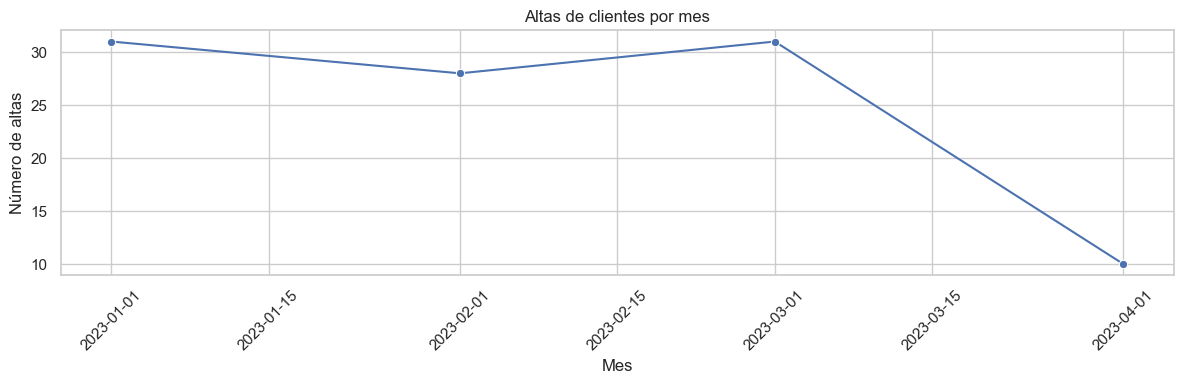

  • Total altas (periodo)         : 100
  • Meses analizados              : 4
  • Primer mes (count)            : 31
  • Último mes (count)            : 10
  • Crecimiento relativo (%)      : -67.74
  • Media mensual                 : 25.00

📈 Top 10 Ciudades por número de clientes


C:\Users\Asus\AppData\Local\Temp\ipykernel_7328\3139513922.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='magma', ax=ax)


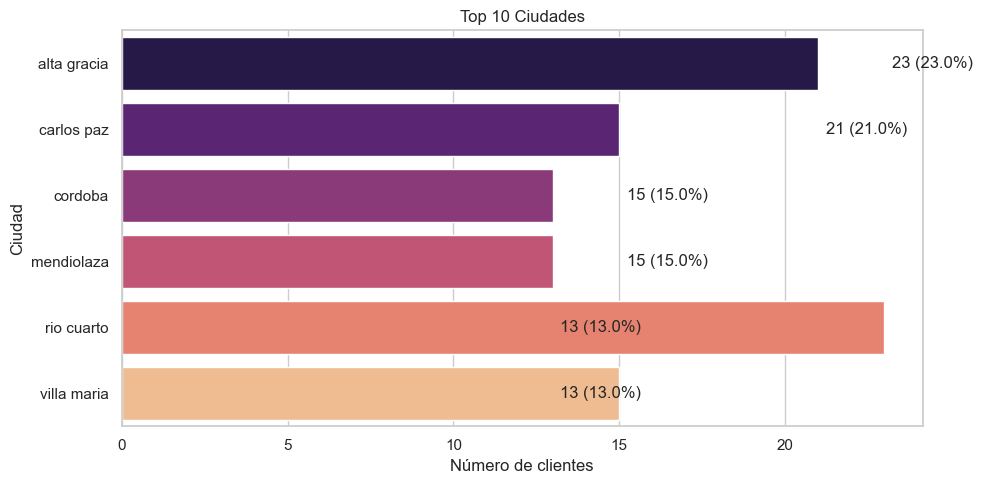

  • Total clientes                : 100
  • Clientes en Top10             : 100
  • Porcentaje en Top10 (%)       : 100.00


,conteo,count
0,rio cuarto,23
1,alta gracia,21
2,carlos paz,15
3,villa maria,15
4,cordoba,13
5,mendiolaza,13



📈 Composición por dominio de email (Top 8)


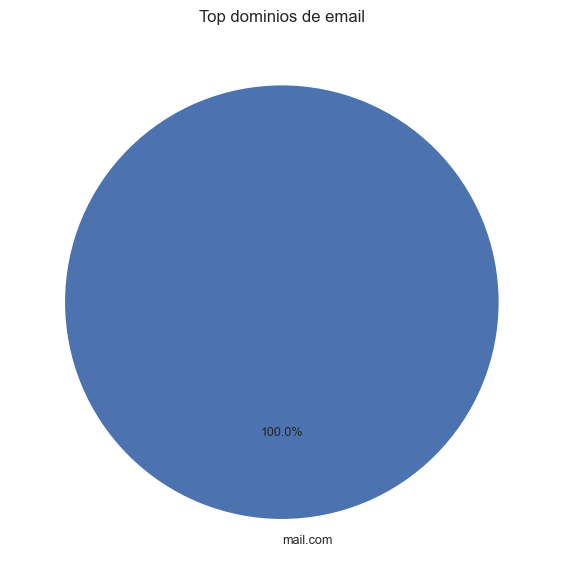

  • Dominios distintos            : 1
  • Top dominio                   : mail.com (100)


,email,count
0,mail.com,100



📈 Altas por día de la semana


C:\Users\Asus\AppData\Local\Temp\ipykernel_7328\3139513922.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow.index, y=dow.values, palette='coolwarm', ax=ax)
C:\Users\Asus\AppData\Local\Temp\ipykernel_7328\3139513922.py:124: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Asus\AppData\Local\Temp\ipykernel_7328\3139513922.py:124: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


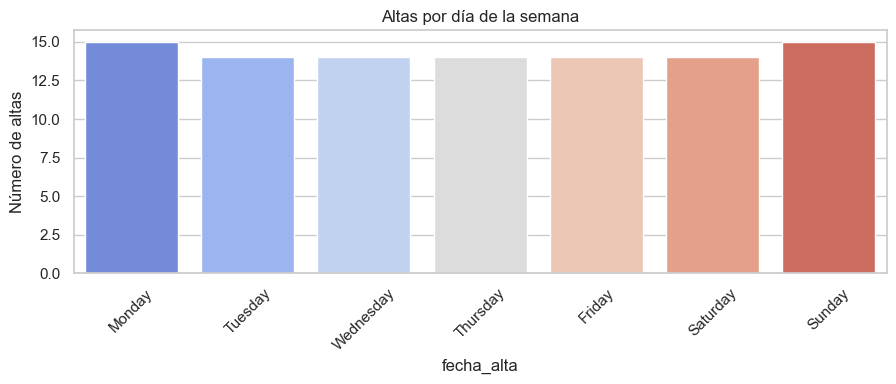

  • Día con más altas             : Monday
  • Máximo (count)                : 15

EDA: Visualizaciones estratégicas completadas.


In [85]:
# EDA: Visualizaciones estratégicas (robusta) - incluye prints extendidos (corrección de índices)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np
import pandas as pd

sns.set(style='whitegrid')

# Prepare dataframe
if 'df' not in globals():
    if 'df_clientes_True' in globals():
        df = df_clientes_True.copy()
    else:
        df = df_clientes_c.copy()

# Ensure fecha_alta is datetime
if 'fecha_alta' in df.columns:
    df['fecha_alta'] = pd.to_datetime(df['fecha_alta'], errors='coerce')

# Helper local prints
def _print_plot_header(title, note=''):
    print('\n' + '='*80)
    print(f'📈 {title}')
    if note:
        print(f'   {note}')
    print('='*80)

# 1) Serie temporal: Altas por mes + crecimiento acumulado
_print_plot_header('Altas de clientes por mes (serie temporal)')
if 'fecha_alta' in df.columns:
    monthly = df['fecha_alta'].dropna().dt.to_period('M').value_counts().sort_index()
    # Convert PeriodIndex to Timestamp safely
    try:
        if isinstance(monthly.index, pd.PeriodIndex):
            x_index = monthly.index.to_timestamp()
        else:
            x_index = pd.to_datetime(monthly.index)
    except Exception:
        x_index = pd.to_datetime(monthly.index.astype(str))

    fig, ax = plt.subplots(figsize=(12,4))
    sns.lineplot(x=x_index, y=monthly.values, marker='o', ax=ax)
    ax.set_title('Altas de clientes por mes')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Número de altas')
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

    # Extended stats
    total = int(monthly.sum())
    first_m, last_m = int(monthly.iloc[0]), int(monthly.iloc[-1])
    pct_change = (last_m - first_m) / first_m * 100 if first_m != 0 else np.nan
    avg_month = monthly.mean()
    print_stat('Total altas (periodo)', total)
    print_stat('Meses analizados', int(len(monthly)))
    print_stat('Primer mes (count)', first_m)
    print_stat('Último mes (count)', last_m)
    print_stat('Crecimiento relativo (%)', pct_change, fmt='{:.2f}')
    print_stat('Media mensual', avg_month, fmt='{:.2f}')
else:
    print('No hay columna fecha_alta para analizar la serie temporal.')

# 2) Top ciudades - barras horizontales con % y acumulado
_print_plot_header('Top 10 Ciudades por número de clientes')
if 'ciudad' in df.columns:
    top = df['ciudad'].value_counts().head(10)
    fig, ax = plt.subplots(figsize=(10,5))
    sns.barplot(x=top.values, y=top.index, palette='magma', ax=ax)
    ax.set_title('Top 10 Ciudades')
    ax.set_xlabel('Número de clientes')
    ax.set_ylabel('Ciudad')
    for i, v in enumerate(top.values):
        pct = v / top.sum() * 100
        ax.text(v + max(top.values)*0.01, i, f'{v} ({pct:.1f}%)', va='center')
    plt.tight_layout()
    plt.show()

    # Print extended summary
    total_clients = len(df)
    print_stat('Total clientes', total_clients)
    print_stat('Clientes en Top10', int(top.sum()))
    print_stat('Porcentaje en Top10 (%)', top.sum()/total_clients*100 if total_clients else np.nan, fmt='{:.2f}')
    display(top.reset_index().rename(columns={'index':'ciudad', 'ciudad':'conteo'}))
else:
    print('No hay columna ciudad para visualización.')

# 3) Email domains composition (if email exists)
_print_plot_header('Composición por dominio de email (Top 8)')
if 'email' in df.columns:
    domains = df['email'].dropna().astype(str).str.extract(r'@([\w\.-]+)$', expand=False)
    domains = domains.fillna('unknown')
    dom_counts = domains.value_counts()
    topd = dom_counts.head(8)
    if topd.sum() > 0:
        fig, ax = plt.subplots(figsize=(8,6))
        ax.pie(topd.values, labels=topd.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize':9})
        ax.set_title('Top dominios de email')
        plt.tight_layout()
        plt.show()

        print_stat('Dominios distintos', int(dom_counts.size))
        print_stat('Top dominio', f"{topd.index[0]} ({topd.iloc[0]})")
        display(topd.reset_index().rename(columns={'index':'dominio', 0:'conteo'}))
    else:
        print('No hay dominios detectables en email.')
else:
    print('No hay columna email para análisis de dominios.')

# 4) Registro por día de la semana (si fecha disponible)
_print_plot_header('Altas por día de la semana')
if 'fecha_alta' in df.columns:
    dow = df['fecha_alta'].dropna().dt.day_name().value_counts()
    # Ensure English day order
    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    # If day_name returned local language, fallback to sorted index
    try:
        dow = dow.reindex(order).fillna(0)
    except Exception:
        dow = dow.sort_index()
    fig, ax = plt.subplots(figsize=(9,4))
    sns.barplot(x=dow.index, y=dow.values, palette='coolwarm', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel('Número de altas')
    ax.set_title('Altas por día de la semana')
    plt.tight_layout()
    plt.show()

    if dow.sum() > 0:
        print_stat('Día con más altas', dow.idxmax())
        print_stat('Máximo (count)', int(dow.max()))
    else:
        print('No hay datos de altas por día.')
else:
    print('No hay fecha_alta para calcular altas por día.')

print('\nEDA: Visualizaciones estratégicas completadas.')
